
In this program we will covered the following things

	- Loading images
 	- Copying Images
	- Fliping Images
	- Cropping an Image

# loading libraries

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Loading image

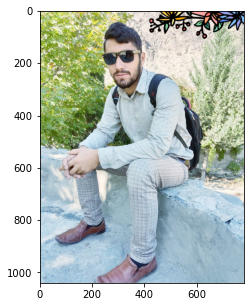

In [8]:
gb = np.array(Image.open('shahid.jpg'))
plt.figure(figsize=(5,5))
plt.imshow(gb)
plt.show()

If we do not apply the method copy(), the two variables would point to the same location in memory:

In [9]:
A = gb

We use the id function to find a variable's memory address; we see the objects in the memory space which the variables A and **gb** point to are the same.

In [10]:
id(A) == id(gb)

True

However, if we apply method copy(), their memory addresses are different.

In [11]:
B = gb.copy()
id(B)==id(gb)

False

There may be unexpected behaviours when two variables point to the same object in memory. Consider the array gb. If we set all its entries to zero, all entires in A will become zero as well. However, as gb and B points to different objects, the values in B will not be affected.

In [12]:
gb[:,:,] = 0

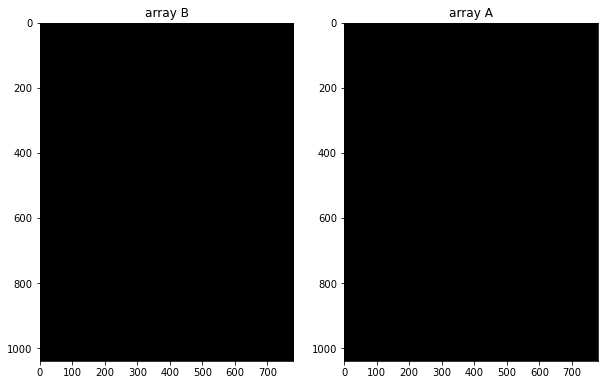

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(gb)
plt.title("array B")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()

We can compare the variables gb and array A:

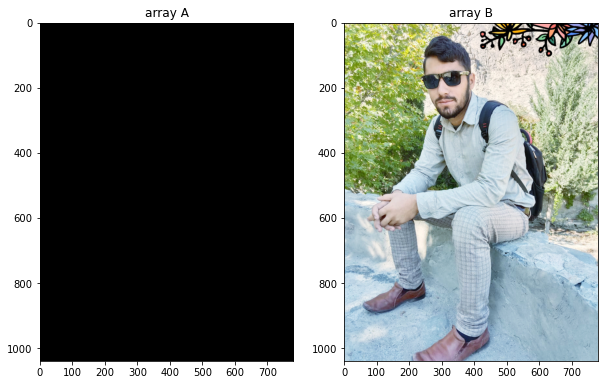

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(gb)
plt.title("array A")
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()

# Flipping Images

Flipping images involves reordering the indices of the pixels such that it changes the orientation of the image. Consider the following image:

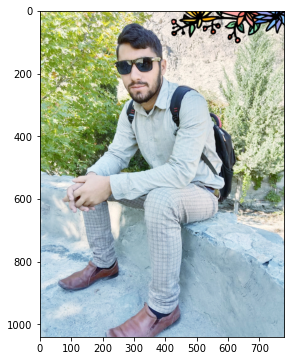

In [15]:

image = Image.open('shahid.jpg')
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.show()

We can cast it to an array and find its shape:

In [16]:
array = np.array(image)
width, height, C = array.shape
print('width', width ,'height and Channel', height, C)

width 1040 height and Channel 780 3


Let's flip, i.e rotate vertically, the image. Let's try the traditional approach. First, we create an array of the same size with datatype np.uint8.

In [17]:
array_flip = np.zeros((width, height, C), dtype=np.uint8)

We assign the first row of pixels of the original array to the new array’s last row. We repeat the process for every row, incrementing the row number from the original array and decreasing the new array’s row index to assign the pixels accordingly. After excecuting the for loop below, array_flip will become the flipped image.

In [18]:
for i,row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row

In [19]:
array_flip

array([[[180, 209, 225],
        [182, 211, 227],
        [185, 212, 229],
        ...,
        [158, 190, 205],
        [160, 192, 207],
        [163, 192, 208]],

       [[180, 209, 223],
        [182, 211, 227],
        [187, 214, 231],
        ...,
        [160, 192, 207],
        [163, 192, 208],
        [164, 193, 209]],

       [[181, 210, 224],
        [184, 213, 227],
        [186, 213, 230],
        ...,
        [161, 193, 208],
        [164, 193, 209],
        [165, 194, 210]],

       ...,

       [[217, 223,  55],
        [233, 237,  90],
        [247, 250, 117],
        ...,
        [  0,   0,   0],
        [  1,   0,   0],
        [  0,   0,   0]],

       [[228, 237,  48],
        [229, 237,  63],
        [229, 241,  71],
        ...,
        [  0,   1,   0],
        [  0,   0,   0],
        [  1,   0,   0]],

       [[233, 246,  44],
        [206, 219,  26],
        [187, 205,   7],
        ...,
        [  0,   0,   2],
        [  0,   0,   2],
        [  1,   0,   0]]

PIL has several ways to flip an image, for example, we can use the ImageOps module:

In [20]:
from PIL import ImageOps

The flip() method of ImageOps module flips the image. The mirror() method will mirror the image:

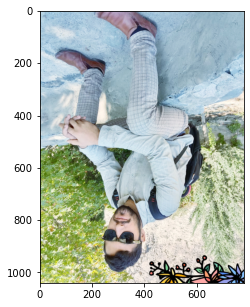

In [21]:
im_flip = ImageOps.flip(image)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

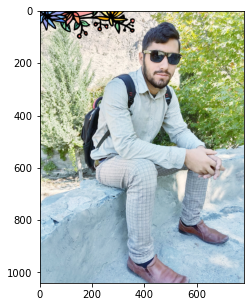

In [22]:
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

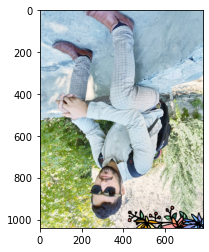

In [23]:
im_flip = image.transpose(1)
plt.imshow(im_flip)
plt.show()

The Image module has built-in attributes that describe the type of flip. The values are just integers. Several are shown in the following dict:

In [24]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE,
        "TRANSVERSE": Image.TRANSVERSE}

In [25]:
flip["FLIP_LEFT_RIGHT"]

0

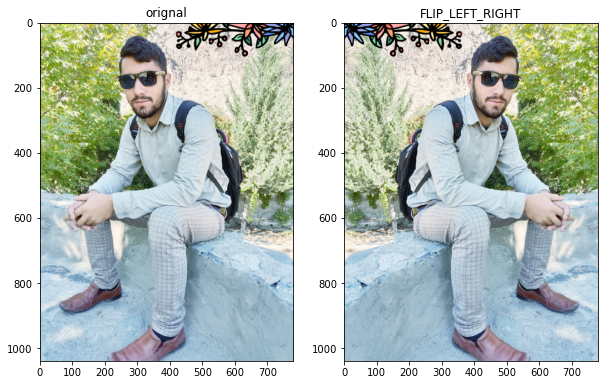

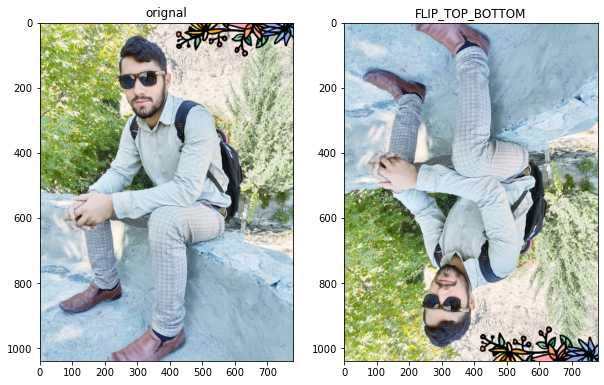

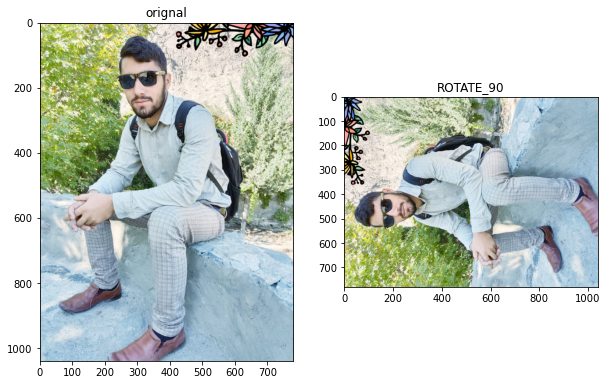

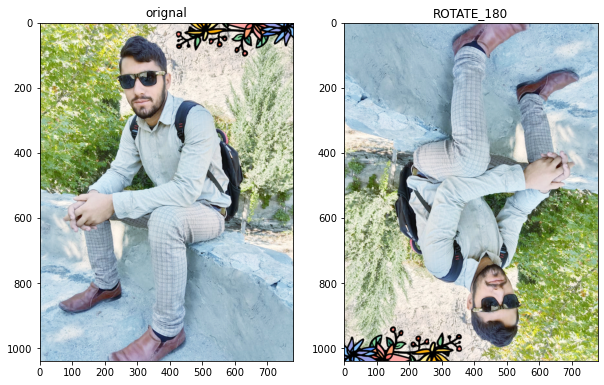

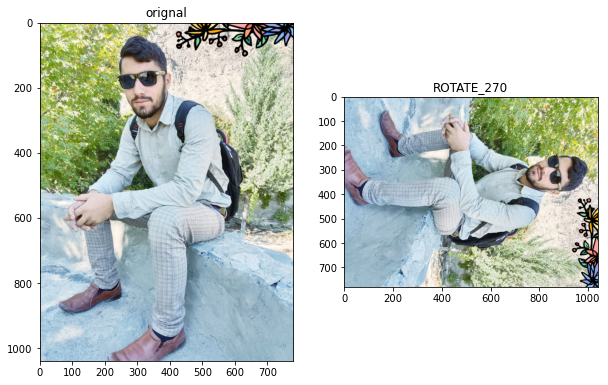

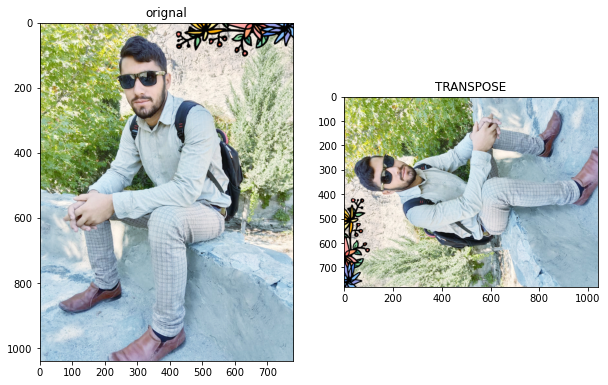

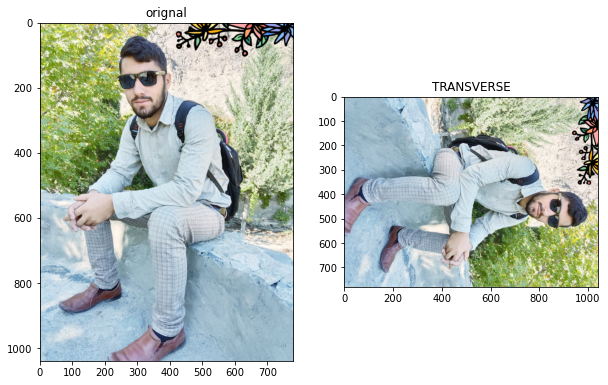

In [26]:
for key, values in flip.items():
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

# Cropping an Image
Cropping is the act of "cutting out" a part of an image and throwing out the rest. We can perform cropping using array slicing.

Let start with a vertical crop: the variable upper is the index of the first row that we would like to include in the image, the variable lower is the index of the last row we would like to include. We then perform array slicing to obtain the new image.

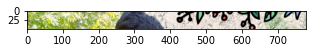

In [27]:
upper = 50
lower = 100
crop_top = array[upper: lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

Consider the array crop_top: we can also crop horizontally. The variable right is the index of the first column that we would like to include in the image and the variable left is the index of the last column we would like to include in the image.

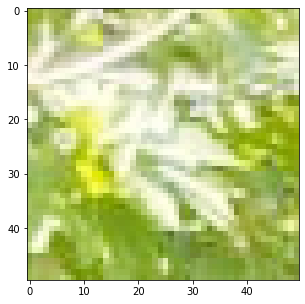

In [28]:
left = 50
right = 100
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

You can crop the PIL image using the crop() method, using the parameters from above Set the cropping area with box=(left, upper, right, lower).

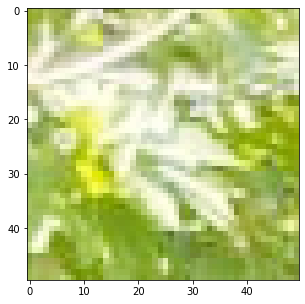

In [29]:
image = Image.open('shahid.jpg')
crop_image = image.crop((left, upper, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

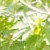

In [30]:
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

     --------------------------------------- 38.1/38.1 MB 94.5 kB/s eta 0:00:00


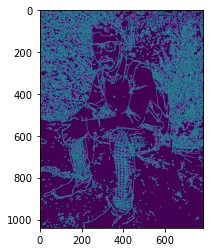

In [31]:
!pip install opencv-python
import cv2

# Load an image
image = cv2.imread('shahid.jpg')

# Display the image
plt.imshow(image)



# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image)


# Save the grayscale image
cv2.imwrite('gray_image.jpg', gray_image)

# Apply edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Display the edges
plt.imshow(edges)



ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
